# Workshop 8. Наивный Байес и Классификация текстов

> Байесовские алгоритмы для классификации текстов  
> Извлечение признаков из текста

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Naive Bayes and Text Classification](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html)
- [ODS - классификация](https://habrahabr.ru/company/ods/blog/322534/)
- [Байесовский классификатор](http://www.machinelearning.ru/wiki/index.php?title=%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80)
- [Интересная статья про спам/не спам](https://habrahabr.ru/post/252265/)

Если вам понравилась задача распознавания текстов, то вот подборочка:

- [библиотека Gensim](https://radimrehurek.com/gensim/)
- [библиотека nltk](http://www.nltk.org/)
- [Лекция про word2vec 🔥](https://www.youtube.com/watch?v=oBb9aFmp0Hs)
- [Лекция Векторные представления слов и документов 🔥](https://www.youtube.com/watch?v=hiDBnEyoZS4)

## Наивный байесовский классификатор

На практике мы использовали его для детекции спам/не спам. В этот раз вы будете классифицировать [новостные тексты](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html). Попробуете разные методы  генерации признаков из текстов.

In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### 2.1 Загрузка данных (2 балла)

Мы будем использовать только 4 класса текстов: `'alt.atheism', 'sci.space', 'talk.religion.misc', 'comp.graphics'`.

Загрузите тренировочную и тестовую части датасета для этих категорий.

In [62]:
categories = ['alt.atheism', 'sci.space', 'talk.religion.misc', 'comp.graphics']

newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

Выведите по 1 тексту для каждой из категории.

In [65]:
print(newsgroups_train.target[0:4])

[1 3 2 0]


In [67]:
for i in range(len(categories)):
    print('\n'.join(newsgroups_train.data[i].split('\n')[:]))

From: rych@festival.ed.ac.uk (R Hawkes)
Subject: 3DS: Where did all the texture rules go?
Lines: 21

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Rycharde Hawkes				email: rych@festival.ed.ac.uk
Virtual Environment Laboratory
Dept. of Psychology			Tel  : +44 31 650 3426
Univ. of Edinburgh			Fax  : +44 31 667 0150

Subject: Re: Biblical Backing of Koresh's 3-02 Tape (Cites enclosed)
From: kmcvay@oneb.almanac.bc.ca (Ken Mcvay)
Organi

### 2.2 Мешок слов

Начнем с самого простого способа извлечения признаков из текстов: обычный подсчет количества употреблений слов в тексте.

Для этого используем [sklearn.feature_extraction.text.CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Настройте его так, чтобы он использовал англиские стоп слова.

Проведите трансформаци текстов из обоих датасетов и выведите размер полученного словаря. (1 векторайзер для тестового и тренировочного датасета! У вас должны получиться матрицы с одинаковыми признаками-словами)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

data = newsgroups_train.data + newsgroups_test.data 

vectorizer = vectorizer.fit(data)

X = vectorizer.transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
print(X.shape)
print(X_test.shape)

(2034, 43255)
(1353, 43255)


Будем использовать классифиактор для мультиклассифкации [sklearn.naive_bayes.MultinomialNB]().

- Проведите кроссвалидацию на 5 фолдах для метрики `accuracy`.
- обучите на тренировочных данных, 
- нарисуйте красивую confusion матрицу, (с именами классов, а не индексами по осям)
- выведите отчет классификации для тестовой выборки (с именами классов, а не индексами)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

score = cross_val_score(MultinomialNB(alpha=0.03), X, newsgroups_train.target, cv=5, scoring='accuracy')
score

array([0.94348894, 0.96805897, 0.96560197, 0.96068796, 0.96305419])

In [7]:
clf = MultinomialNB(alpha=0.03).fit(X, newsgroups_train.target)

y_predicted = clf.predict(X_test)

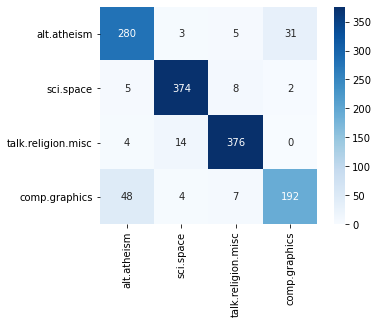

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


_ = sns.heatmap(confusion_matrix(newsgroups_test.target, y_predicted), cmap=plt.cm.Blues, square=True, annot=True, fmt='.4g', xticklabels=categories, yticklabels=categories)


In [81]:
print(classification_report(newsgroups_test.target, y_predicted, target_names=categories))

                    precision    recall  f1-score   support

       alt.atheism       0.83      0.88      0.85       319
         sci.space       0.95      0.96      0.95       389
talk.religion.misc       0.95      0.95      0.95       394
     comp.graphics       0.85      0.76      0.81       251

          accuracy                           0.90      1353
         macro avg       0.90      0.89      0.89      1353
      weighted avg       0.90      0.90      0.90      1353



In [10]:
# Посмотрим на ТОП 10 по важности слова в каждой категории
import numpy as np

def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.coef_[i])[-10:]
        print("%s: [%s]" % (category, " ".join(feature_names[top10])))

show_top10(clf, vectorizer, newsgroups_train.target_names)

alt.atheism: [article organization don lines subject com writes people god edu]
comp.graphics: [file posting university com image organization graphics subject lines edu]
sci.space: [gov article writes com lines organization subject nasa edu space]
talk.religion.misc: [article writes lines jesus organization people subject god com edu]


### 2.3 [Tf-IDF](https://ru.wikipedia.org/wiki/TF-IDF)

Мешок слов не учитывает "веса" слов, он просто смотрит их вхождение в документ. Вероятно, было бы полезно взвесить каким-то обраом каждое слово в документе. Действительно, если слово встречается во всех документах, то, наверное, его вес небольшой. А если редкое слово встречается в некоторых документах, то скорее всего оно какое-то узко тематическое.

Один из способов взвесить слова - это использовать меру tf-idf, где:

**TF - term frequency** - частота слова для каждой статьи

$$\LARGE \mathrm{tf}(t,d) = \frac{n_t}{\sum_k n_k}$$

**IDF - inverse document frequency*** — обратная частота документа - уменьшает вес часто встречаемых слов

$$\LARGE \mathrm{idf}(t, D) =  \log \frac{|D|}{|\{\,d_i \in D \mid t \in d_{i}\, \}|}$$

$D$ - число документов в корпусе

$|\{\,d_i \in D \mid t \in d_{i}\, \}|$ - число документов из коллекции ${\displaystyle D}$ , в которых встречается ${\displaystyle t}$  (когда ${\displaystyle n_{t}\neq 0}$ ).

**TF-IDF**

$$\LARGE \operatorname{tf-idf}(t,d,D) = \operatorname{tf}(t,d) \times \operatorname{idf}(t, D)$$


Для него есть класс [sklearn.feature_extraction.text.TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

- Проведите кроссвалидацию на 5 фолдах для метрики `accuracy`.
- обучите на тренировочных данных, 
- нарисуйте красивую confusion матрицу, (с именами классов, а не индексами по осям)
- выведите отчет классификации для тестовой выборки (с именами классов, а не индексами)

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')

tfidf_vectorizer = tfidf_vectorizer.fit(data)

X = tfidf_vectorizer.transform(newsgroups_train.data)
X_test = tfidf_vectorizer.transform(newsgroups_test.data)

print(X.shape)
print(X_train.shape)

(2034, 43255)
(1353, 43255)


In [87]:
score = cross_val_score(MultinomialNB(alpha=0.03), X, newsgroups_train.target, cv=5, scoring='accuracy')
score

array([0.94348894, 0.96805897, 0.96560197, 0.96068796, 0.96305419])

In [88]:
clf = MultinomialNB(alpha=0.03).fit(X, newsgroups_train.target)

y_predicted = clf.predict(X_test)

                    precision    recall  f1-score   support

       alt.atheism       0.85      0.87      0.86       319
         sci.space       0.94      0.96      0.95       389
talk.religion.misc       0.93      0.94      0.94       394
     comp.graphics       0.84      0.77      0.81       251

          accuracy                           0.90      1353
         macro avg       0.89      0.89      0.89      1353
      weighted avg       0.90      0.90      0.90      1353



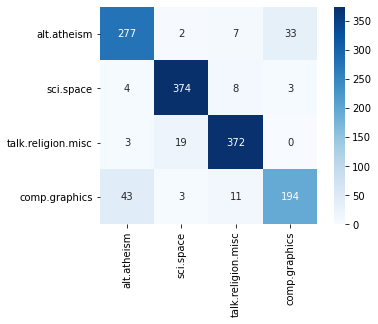

In [89]:
print(classification_report(newsgroups_test.target, y_predicted, target_names=categories))
_ = sns.heatmap(confusion_matrix(newsgroups_test.target, y_predicted), cmap=plt.cm.Blues, square=True, annot=True, fmt='.4g', xticklabels=categories, yticklabels=categories)

In [90]:
show_top10(clf, tfidf_vectorizer, newsgroups_train.target_names)

alt.atheism: [sgi livesey atheists writes people caltech com god keith edu]
comp.graphics: [organization thanks files subject image com lines university edu graphics]
sci.space: [toronto moon gov com alaska access henry nasa edu space]
talk.religion.misc: [objective apple kent people christian jesus sandvik edu com god]


### 2.4 В чём проблема?

Как вы заметили, качество немного улучшилось. Как вы думаете почему у нас до сих пор есть ошибки? В чём проблема? Опирайтесь на вывод топа 10 важных слов, confusion matrix и репорт классификации.

**Задание**: Напишите развернутое рассуждение.

**Ответ:** ошибки возникают из-за того, что в список значимых слов по каждой категории попадаются повторяющиеся слова. Например, edu и com, которые встречаются вообще во всех категориях. Проблема заключается в самих текстах. Судя по всему, данные вытаскивали прямо из базы данных, поэтому там присутствует лишняя информация (ссылки на статьи, мейлы авторов и т.д.) В идеале, можно попробовать предобработать сами тексты. Трудно сказать, что tf-idf работает значительно лучше, чем bag-words, однако tf-idf делает более осмысленные векторы слов, что видно из топ-10

![](https://i.imgur.com/3D5pgrk.png)

Можно еще немного улучшить качество предсказания, если использовть n-граммы, то есть не только одиночные слова, но и пары, тройки. Для этого у векторайзера есть параметр `ngram_range`, но будьте осторожны, сгенерируется очень много признаков. Их количество можно ограничить  `max_features`. Ещё можно копать в сторону правильного процессинга текстов: лемматизация и стемминг, чтобы убирать окончания, но это обчно не сильно помогает в английском языке.

Кроме того можно было бы пойти совсем в другую сторону и использовать word-2-vec технологии, тогда бы у нас слова начал "обретать" смысл. Но это вовсем другая история.

In [125]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 3))

data = newsgroups_train.data + newsgroups_test.data 

vectorizer = vectorizer.fit(data)

X = vectorizer.transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
print(X.shape)
print(X_test.shape)

(2034, 753540)
(1353, 753540)


In [126]:
score = cross_val_score(MultinomialNB(alpha=0.03), X, newsgroups_train.target, cv=5, scoring='accuracy')
score

array([0.94840295, 0.97788698, 0.96314496, 0.94840295, 0.97783251])

In [127]:
clf = MultinomialNB(alpha=0.03).fit(X, newsgroups_train.target)

y_predicted = clf.predict(X_test)

                    precision    recall  f1-score   support

       alt.atheism       0.86      0.86      0.86       319
         sci.space       0.92      0.96      0.94       389
talk.religion.misc       0.96      0.89      0.93       394
     comp.graphics       0.79      0.82      0.81       251

          accuracy                           0.89      1353
         macro avg       0.88      0.88      0.88      1353
      weighted avg       0.89      0.89      0.89      1353



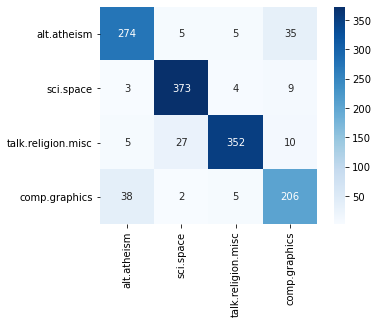

In [128]:
_ = sns.heatmap(confusion_matrix(newsgroups_test.target, y_predicted), cmap=plt.cm.Blues, square=True, annot=True, fmt='.4g', xticklabels=categories, yticklabels=categories)
print(classification_report(newsgroups_test.target, y_predicted, target_names=categories))